<a href="https://colab.research.google.com/github/MaxKho/Data-Analysis/blob/main/Applied_Statistics_coursework_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#1.a
def count_measure(input_set):
  assert isinstance(input_set, set), 'Input needs to be a set'
  count = 0
  for i in range(len(input_set)):
    count += 1
  return count

A measure M is additive if and only if, for any two disjoint sets A and B, M(A∪B) = M(A) + M(B)

In [17]:
#1.b
if count_measure({'a', 'b', 'c'}) + count_measure({'d', 'e', 'f'}) == count_measure({'a', 'b', 'c'}.union({'d', 'e', 'f'})):
  print('Measure satisfies additivity')
else:
  print("Measure doesn't satisfy additivity")

Measure satisfies additivity


In [18]:
#2
class Interval:
  def __init__(self, lower_bound, upper_bound):
    self.lower_bound = lower_bound
    self.upper_bound = upper_bound

def get_length(interval):
  assert isinstance(interval, Interval),  'Input needs to be an instance of the Interval class'
  assert interval.upper_bound > interval.lower_bound, 'Upper_bound needs to be greater than the lower_bound'
  return(interval.upper_bound - interval.lower_bound)

get_length(Interval(1,3.5))

2.5

0.8646647167633873
0.0
0.13533528117545912
1.0


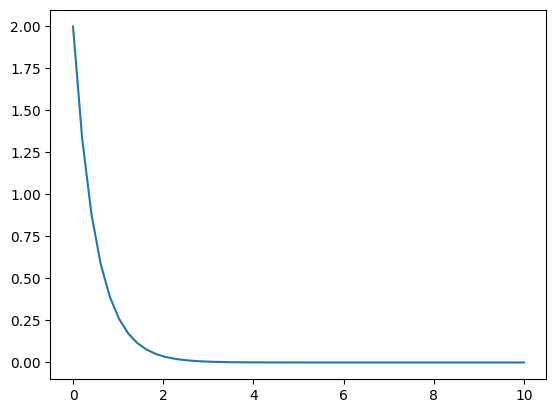

In [30]:
#3
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

def expon_measure(interval):
  assert isinstance(interval, Interval), 'Input needs to be an instance of the Interval class'
  cdf_lower_bound = scipy.stats.expon.cdf(interval.lower_bound,0,1/2)
  cdf_mass_upper_bound = scipy.stats.expon.cdf(interval.upper_bound,0,1/2)
  probability_mass = cdf_mass_upper_bound - cdf_lower_bound
  return probability_mass

print(expon_measure(Interval(0,1)))
print(expon_measure(Interval(1,1)))
print(expon_measure(Interval(1,10)))
print(expon_measure(Interval(0,float('inf'))))

plt.plot(np.linspace(0,10), scipy.stats.expon.pdf(np.linspace(0,10),0,1/2))
plt.show()

Visually, the answers make sense as the probability mass of the interval [0,1] was determined to be quite high (0.86 to 2d.p.) by the expon_measure() function while the mass of the interval [1,10] was determined to be quite low (0.14 to 2d.p.), and the probability mass of anything outside these two intervals is practically 0 (0.00 to 2d.p.).

This is consistent with the pdf plot, which shows high values in the interval [0,1], non-negligible values in the interval [1,2] ─ a subset of the interval [1,10] ─ and negligibly low values for x>2.

In [20]:
#4
from scipy.integrate import quad

def expon_pdf(x):
  return scipy.stats.expon.pdf(x,0,1/2)

def expon_integrator(interval):
  assert isinstance(interval, Interval), 'Input needs to be an instance of the Interval class'
  return(quad(expon_pdf, interval.lower_bound, interval.upper_bound))

In [21]:
#4.a
expon_integrator(Interval(0,1))

(0.8646647167633872, 9.59970677131702e-15)

In [22]:
#4.b
expon_integrator(Interval(1,1))

(0.0, 0.0)

In [29]:
#4.c
expon_integrator(Interval(1,10))

(0.13533528117545912, 2.4502060294750603e-09)

In [24]:
#4.d
expon_integrator(Interval(0,float('inf')))

(0.9999999999999999, 1.547006406148436e-10)

The answers for question 4 are the same as the answers for question 3 because the probability mass of an interval is by definition the integral of the PDF over that interval (because the PDF by definition is the derivative of the CDF).